In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
sys.path.insert(0,'../../')
from helpers import *
from scipy.stats import norm
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
count_df = pd.read_pickle('../data/count_df.pkl')
count_df_with_label = pd.read_pickle('../data/count_df_with_label.pkl')

In [3]:
count_df_with_label['phenotype_status'].describe()

count    85.000000
mean      0.764706
std       0.426700
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: phenotype_status, dtype: float64

In [11]:
TCRs = count_df.drop(['sample_name','phenotype_status'],axis=1).columns.values
threshold = 0.2
kf = LeaveOneOut()
for train_index,test_index in kf.split(count_df): # for each cv round

    train_cv, test_cv = count_df.iloc[train_index], count_df.iloc[test_index] # get training samples and one testing sample

    # Select a list of associated TCRs based on count df of training samples and threshold
    count_train = count_df[count_df['sample_name'].isin(train_cv['sample_name'])] # count df of training samples
    count_test = count_df[count_df['sample_name'].isin(test_cv['sample_name'])] # count df of the testing sample

    TCRs_asso = TCRs_selection(count_train,TCRs,threshold) # select a list of TCRs

#     '''
#     Get statistics: number of phenotype_associated_TCRs of each sample
#     '''
#     # training set
#     train_sample = train_cv['sample_name'].tolist()
#     train_asso = []
#     for i in range(len(train_sample)): # for each training sample

#         temp_train = count_train.loc[count_train.sample_name==train_sample[i]] # count df of the training sample
#         i_asso = np.count_nonzero(temp_train[TCRs_asso].values) # count the number of phenotype_associated TCRs in this sample
#         train_asso.append(i_asso)

#     train_cv['phenotype_associated_TCRs'] = train_asso # add the 'phenotype_associated_TCRs' column to the training data


#     # testing set, the same steps as the above
#     test_sample = test_cv['sample_name'].tolist()
#     test_asso = []
#     for i in range(len(test_sample)): # for each testing sample (in LOOCV, only one)

#         temp_test = count_test.loc[count_test.sample_name==test_sample[i]]
#         i_asso = np.count_nonzero(temp_test[TCRs_asso].values)
#         test_asso.append(i_asso)

#     test_cv['phenotype_associated_TCRs'] = test_asso
    break

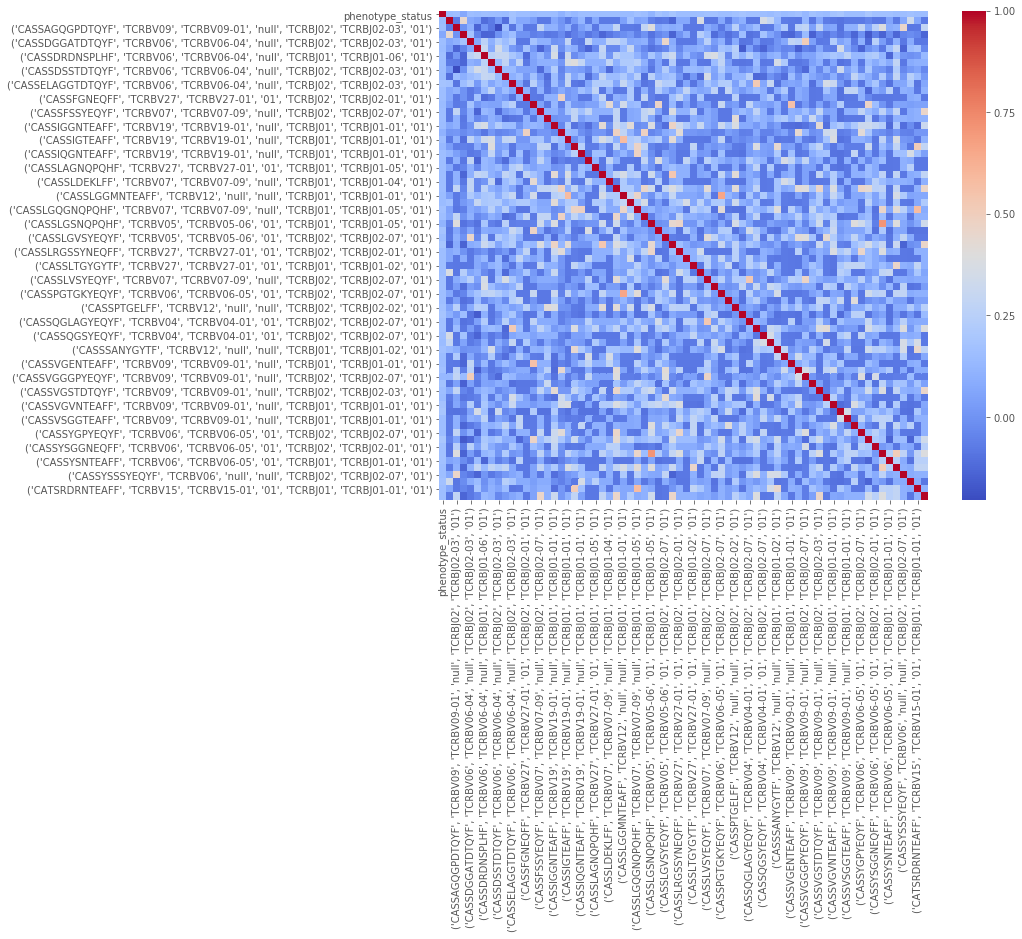

In [14]:
#correlation matrix
# asso = TCRs_asso.tolist()
# asso.insert(0,'phenotype_status')
col = np.insert(TCRs_asso,0,'phenotype_status')
corrmat = train_cv[col].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True,cmap='coolwarm')

In [16]:
corrmat.head()

,phenotype_status,"(CASSAGGGYTF, TCRBV09, TCRBV09-01, null, TCRBJ01, TCRBJ01-02, 01)","(CASSAGQGPDTQYF, TCRBV09, TCRBV09-01, null, TCRBJ02, TCRBJ02-03, 01)","(CASSARTGELFF, TCRBV09, TCRBV09-01, null, TCRBJ02, TCRBJ02-02, 01)","(CASSDGGATDTQYF, TCRBV06, TCRBV06-04, null, TCRBJ02, TCRBJ02-03, 01)","(CASSDGTGGTDTQYF, TCRBV06, TCRBV06-04, null, TCRBJ02, TCRBJ02-03, 01)","(CASSDRDNSPLHF, TCRBV06, TCRBV06-04, null, TCRBJ01, TCRBJ01-06, 01)","(CASSDSSGGGTDTQYF, TCRBV06, TCRBV06-04, null, TCRBJ02, TCRBJ02-03, 01)","(CASSDSSTDTQYF, TCRBV06, TCRBV06-04, null, TCRBJ02, TCRBJ02-03, 01)","(CASSEDSNQPQHF, TCRBV06, TCRBV06-04, null, TCRBJ01, TCRBJ01-05, 01)",...,"(CASSYGPYEQYF, TCRBV06, TCRBV06-05, 01, TCRBJ02, TCRBJ02-07, 01)","(CASSYQGGNYGYTF, TCRBV06, TCRBV06-05, 01, TCRBJ01, TCRBJ01-02, 01)","(CASSYSGGNEQFF, TCRBV06, TCRBV06-05, 01, TCRBJ02, TCRBJ02-01, 01)","(CASSYSGGNQPQHF, TCRBV06, TCRBV06-05, 01, TCRBJ01, TCRBJ01-05, 01)","(CASSYSNTEAFF, TCRBV06, TCRBV06-05, 01, TCRBJ01, TCRBJ01-01, 01)","(CASSYSSGANVLTF, TCRBV06, TCRBV06-05, 01, TCRBJ02, TCRBJ02-06, 01)","(CASSYSSSYEQYF, TCRBV06, null, null, TCRBJ02, TCRBJ02-07, 01)","(CASSYSTSGGNEQFF, TCRBV06, null, null, TCRBJ02, TCRBJ02-01, 01)","(CATSRDRNTEAFF, TCRBV15, TCRBV15-01, 01, TCRBJ01, TCRBJ01-01, 01)","(CSARDRVGNTIYF, TCRBV20, null, null, TCRBJ01, TCRBJ01-03, 01)"
phenotype_status,1.000000,0.147168,0.155043,0.073372,0.155043,0.145736,0.161922,0.155043,0.149293,0.148342,...,0.155043,0.198398,0.168550,0.170419,0.168550,0.155043,0.155043,0.168550,0.155043,0.155043
"(CASSAGGGYTF, TCRBV09, TCRBV09-01, null, TCRBJ01, TCRBJ01-02, 01)",0.147168,1.000000,-0.073016,0.449792,0.073016,0.042895,-0.112650,-0.073016,0.017577,-0.107476,...,-0.073016,-0.044191,-0.079377,-0.080257,0.056698,-0.073016,0.073016,0.328846,0.073016,-0.073016
"(CASSAGQGPDTQYF, TCRBV09, TCRBV09-01, null, TCRBJ02, TCRBJ02-03, 01)",0.155043,-0.073016,1.000000,0.003138,0.102564,-0.135572,0.009129,-0.076923,-0.203692,0.150970,...,0.282051,0.059858,0.250873,0.388938,0.083624,0.102564,0.461538,-0.083624,-0.076923,0.282051
"(CASSARTGELFF, TCRBV09, TCRBV09-01, null, TCRBJ02, TCRBJ02-02, 01)",0.073372,0.449792,0.003138,1.000000,0.178875,-0.046090,-0.135937,-0.128665,-0.002266,0.101623,...,0.003138,-0.165782,-0.057996,-0.141424,-0.017058,-0.128665,-0.040796,-0.017058,-0.040796,-0.128665
"(CASSDGGATDTQYF, TCRBV06, TCRBV06-04, null, TCRBJ02, TCRBJ02-03, 01)",0.155043,0.073016,0.102564,0.178875,1.000000,0.075318,0.264744,0.102564,0.228382,0.150970,...,0.102564,-0.126367,0.250873,0.033821,-0.083624,0.102564,-0.076923,0.083624,-0.076923,-0.076923


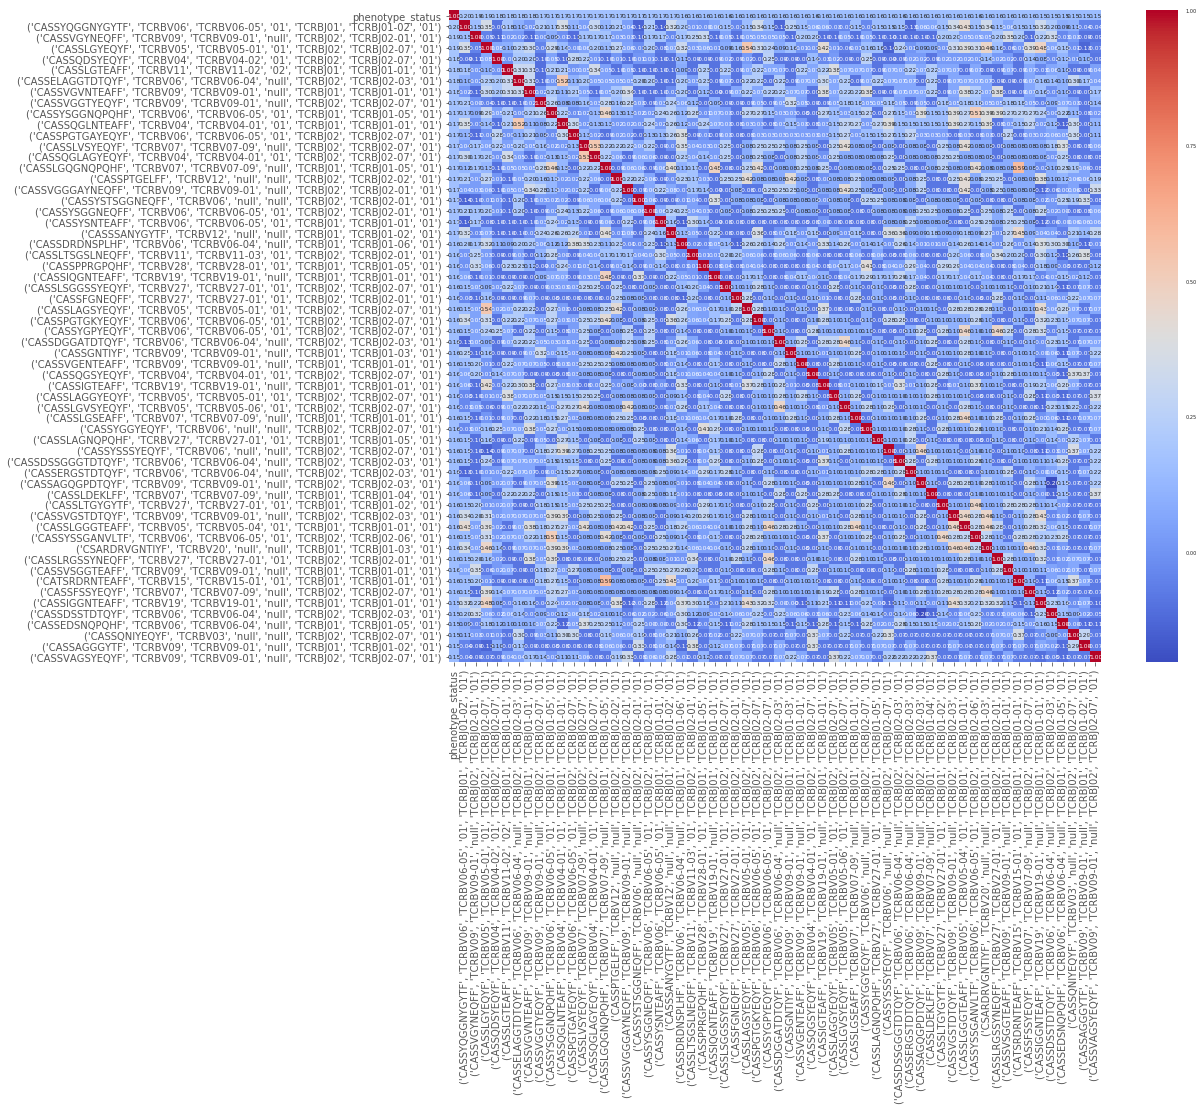

In [15]:
#phenotype_status correlation matrix
f, ax = plt.subplots(figsize=(16, 12))
k = 60 #number of variables for heatmap
cols = corrmat.nlargest(k, 'phenotype_status')['phenotype_status'].index
cm = np.corrcoef(train_cv[cols].values.T)
sns.set(font_scale=0.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', cmap='coolwarm',annot_kws={'size': 6}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# #scatterplot
# sns.set()
# cols = corrmat.nlargest(23, 'phenotype_status')['phenotype_status'].index
# sns.pairplot(train_cv[cols])
# plt.show();